# Tutorial 11 - Introduction to Statistical Inference

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:
- Describe real world examples of questions that can be answered with the statistical inference methods.
- Name common population parameters (e.g., mean, proportion, median, variance, standard deviation) that are often estimated using sample data, and use computation to estimate these.
- Define the following statistical sampling terms (population, sample, population parameter, point estimate, sampling distribution).
- Explain the difference between a population parameter and sample point estimate.
- Use computation to draw random samples from a finite population.
- Use computation to create a sampling distribution from a finite population.
- Describe how sample size influences the sampling distribution.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(digest)
library(infer)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




###  Virtual sampling simulation

In this tutorial you will study samples and sample means generated from different distributions. In real life, we rarely, if ever, have measurements for our entire population. Here, however, we will make simulated datasets so we can understand the behaviour of sample means.

Suppose we had the data science final grades for a large population of students. 

In [2]:
# run this cell to simulate a finite population
set.seed(20201) # DO NOT CHANGE
students_pop <- tibble(grade = (rnorm(mean = 70, sd = 8, n = 10000)))
students_pop

grade
<dbl>
82.47102
73.29210
72.24852
⋮
72.65407
83.26502
68.36166


**Question 1.0** 
<br> {points: 1}

Visualize the distribution of the population (`students_pop`) that was just created by plotting a histogram using `binwidth = 1` in the `geom_histogram` argument. Name the plot `pop_dist` and give x-axis a descriptive label.

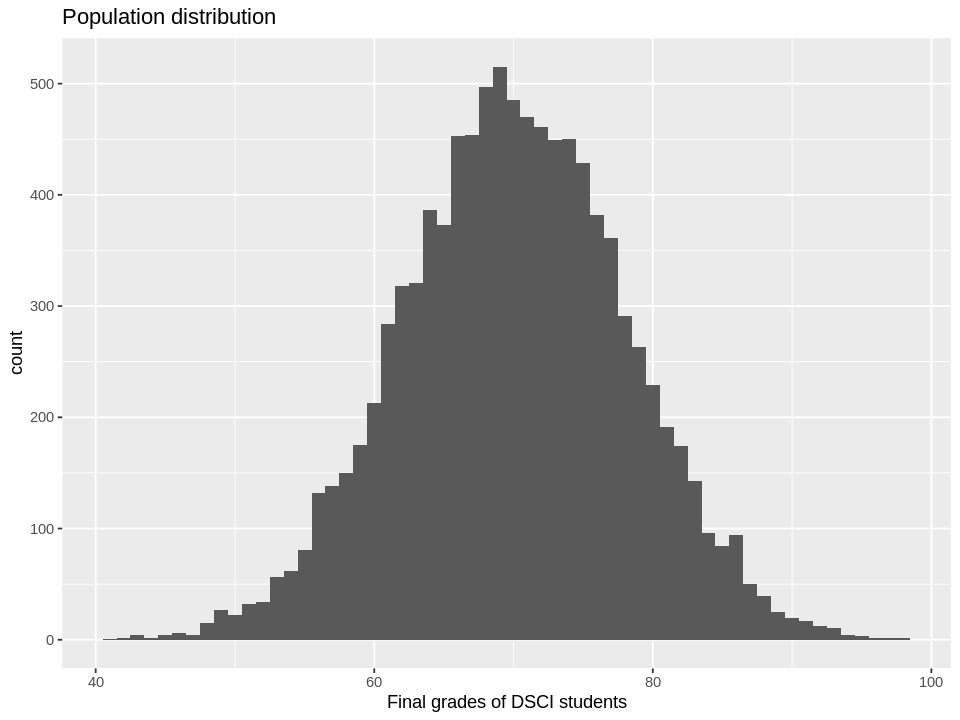

In [3]:
options(repr.plot.width = 8, repr.plot.height = 6)
pop_dist <- ggplot(students_pop, aes(x=grade)) + 
   geom_histogram(binwidth=1) +
   labs(x="Final grades of DSCI students") +
   ggtitle("Population distribution")

# your code here
 # No Answer - remove if you provide an answer
pop_dist

In [4]:
test_1.0()

Test passed 🥳
Test passed 😀
Test passed 🥇
[1] "Success!"


**Question 1.1** 
<br> {points: 3}

Describe in words the distribution above, comment on the shape, center and how spread out the distribution is. 

In the distribuiton above, the graph is in a bell shape, the centre is around 70 and the distribution is spread from 40 to 100.
This means that the mean score of all the grades is around 70% and that the range of grades is from 40% to about 100% showing that the distribution is somewhat narrow as it doesn't go from 0 to 100, with most students scoring around 70%.

**Question 1.2** 
<br> {points: 1}

Use `summarise` to calculate the following population parameters from the `students_pop` population:
- mean (use the `mean` function)
- median (use the `median` function)
- standard deviation (use the `sd` function)

Name this data frame `pop_parameters` which has the column names `pop_mean`, `pop_med` and `pop_sd`.

In [5]:
# your code here
pop_parameters <- summarise(students_pop,pop_mean=mean(grade),pop_med=median(grade),pop_sd = sd(grade)) # No Answer - remove if you provide an answer
pop_parameters

pop_mean,pop_med,pop_sd
<dbl>,<dbl>,<dbl>
70.03288,70.01299,8.05165


In [6]:
test_1.2()

Test passed 🥇
[1] "Success!"


**Question 1.2.1** 
<br> {points: 1}

Draw one random sample of 5 students from our population of students (`students_pop`). 
Use `summarize` to calculate the mean, median, and standard deviation for these 5 students.

Name this data frame `ests_5` which should have column names `mean_5`, `med_5` and `sd_5`. Use the seed `4321`. 

In [7]:
set.seed(4321) # DO NOT CHANGE!
# your code here
ests_5 <- rep_sample_n(students_pop,size=5) |>
          summarize(mean_5 = mean(grade),med_5 = median(grade), sd_5 = sd(grade)) |>
          select(-replicate)
 # No Answer - remove if you provide an answer
ests_5

mean_5,med_5,sd_5
<dbl>,<dbl>,<dbl>
69.76367,73.5182,16.88339


In [8]:
test_1.2.1()

Test passed 🎉
[1] "Success!"


**Question 1.2.2** Multiple Choice:
<br> {points: 1}

Which of the following is the point estimate for the average final grade for the population of data science students (rounded to two decimal places)? 

A. 70.03 

B. 69.76

C. 73.52

D. 8.05 

*Assign your answer to an object called `answer1.2.2`. Your answer should be a single character surrounded by quotes.*

In [9]:
# your code here
answer1.2.2 <- "B"# No Answer - remove if you provide an answer

In [10]:
test_1.2.2()

Test passed 🎊
[1] "Success!"


**Question 1.2.3** 
<br> {points: 1}

Draw one random sample of 100 students from our population of students (`students_pop`). Use `summarize` to calculate the mean, median and standard deviation for these 100 students.

Name this data frame `ests_100` which has the column names `mean_100`, `med_100` and `sd_100`. Use the seed `4321`. 

In [11]:
set.seed(4321) # DO NOT CHANGE!
ests_100 <- rep_sample_n(students_pop,size=100)|>
            summarize(mean_100 = mean(grade),med_100 = median(grade),sd_100 = sd(grade)) |>
            select(-replicate)
# your code here
 # No Answer - remove if you provide an answer
ests_100

mean_100,med_100,sd_100
<dbl>,<dbl>,<dbl>
71.57394,73.53689,7.998619


In [12]:
test_1.2.3()

Test passed 🌈
[1] "Success!"


### Exploring the sampling distribution of the sample mean for different populations
We will create the sampling distribution of the sample mean by taking 1500 random samples of size 5 from this population and visualize the distribution of the sample means. 


**Question 1.3** 
<br> {points: 1}

Draw 1500 random samples from our population of students (`students_pop`). Each sample should have 5 observations. Name the data frame `samples` and use the seed `4321`.

In [13]:
set.seed(4321) # DO NOT CHANGE!
samples <- rep_sample_n(students_pop, size = 5, reps = 1500)
# your code here
 # No Answer - remove if you provide an answer
head(samples)
tail(samples)
dim(samples)

replicate,grade
<int>,<dbl>
1,59.23913
1,76.06602
1,73.51820
1,92.08262
1,47.91240
2,85.42029


replicate,grade
<int>,<dbl>
1499,67.25662
1500,71.57016
1500,62.44389
1500,76.56512
1500,71.66241
1500,76.21743


[1] 7500    2

In [14]:
test_1.3()

Test passed 🥳
Test passed 😀
Test passed 🌈
[1] "Success!"


**Question 1.4** 
<br> {points: 1}

Group by the sample replicate number, and then for each sample, calculate the mean. Name the data frame `sample_estimates`. The data frame should have the column names `replicate` and `sample_mean`.

In [15]:
# your code here
sample_estimates <- samples |>
                    group_by(replicate) |>
                    summarize(sample_mean = mean(grade))
# No Answer - remove if you provide an answer
head(sample_estimates)
tail(sample_estimates)

replicate,sample_mean
<int>,<dbl>
1,69.76367
2,75.22476
3,69.90881
4,66.11345
5,75.26159
6,63.41461


replicate,sample_mean
<int>,<dbl>
1495,65.80124
1496,66.44409
1497,67.86570
1498,69.39292
1499,70.64449
1500,71.69180


In [16]:
test_1.4()

Test passed 🌈
Test passed 🥳
[1] "Success!"


**Question 1.5** 
<br> {points: 1}

Visualize the distribution of the sample estimates (`sample_estimates`) you just calculated by plotting a histogram using `binwidth = 1` in the `geom_histogram` argument. Name the plot `sampling_distribution` and give the plot (using `ggtitle`) and the x axis a descriptive label.

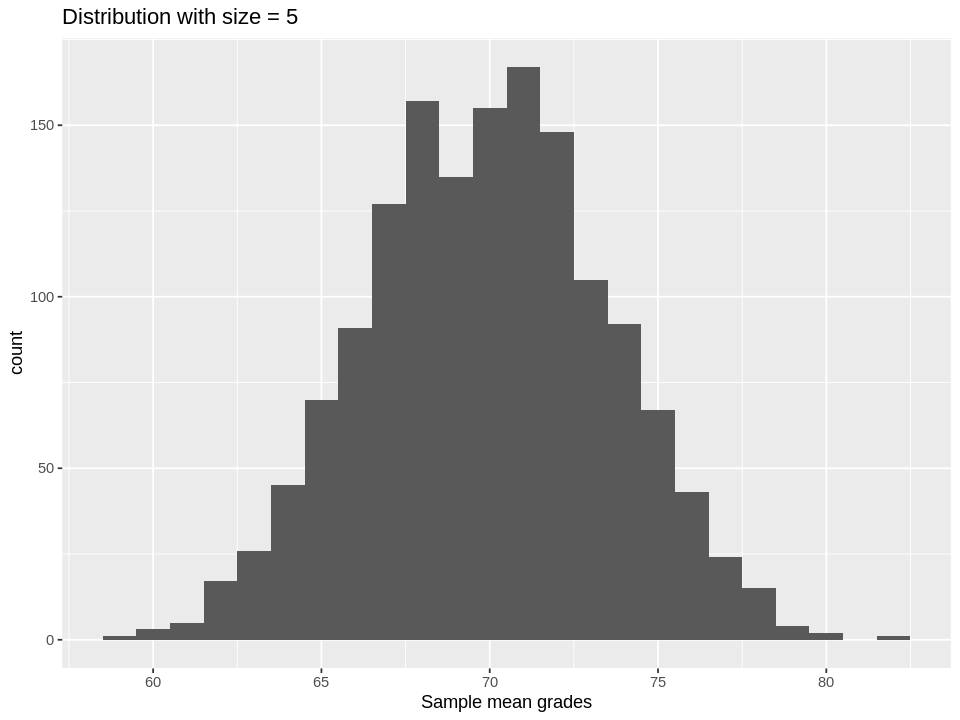

In [17]:
options(repr.plot.width = 8, repr.plot.height = 6)
# your code here
sampling_distribution_5 <- sample_estimates |>
                         ggplot(aes(x=sample_mean)) +
                         geom_histogram(binwidth=1) +
                         labs(x="Sample mean grades") +
                         ggtitle("Distribution with size = 5")


# No Answer - remove if you provide an answer
sampling_distribution_5

In [18]:
test_1.5()

Test passed 😀
Test passed 😀
Test passed 🎉
Test passed 🎉
[1] "Success!"


**Question 1.6** 
<br> {points: 3}

Describe in words the distribution above, comment on the shape, center and how spread out the distribution is. Compare this sampling distribution to the population distribution of students' grades above. 

The distribution above is simillar to a bell shape however it has two peaks at both 67 and 72. The center of the graph is still around 70% and the spread of this distribution is much smaller than the above graph as it only goes from about 55 - 85.

**Question 1.6.1** 
<br> {points: 3}

Repeat **Q1.3 - 1.5**, but now for 100 observations:  
1. Draw 1500 random samples from our population of students (`students_pop`). Each sample should have 100 observations. Use the seed `4321`.
2. Group by the sample replicate number, and then for each sample, calculate the mean (call this column `sample_mean_100`).
3. Visualize the distribution of the sample estimates you calculated by plotting a histogram using `binwidth = 0.5` in the `geom_histogram` argument. Name the plot `sampling_distribution_100` and give the plot title (using `ggtitle`) and the x axis a descriptive label.

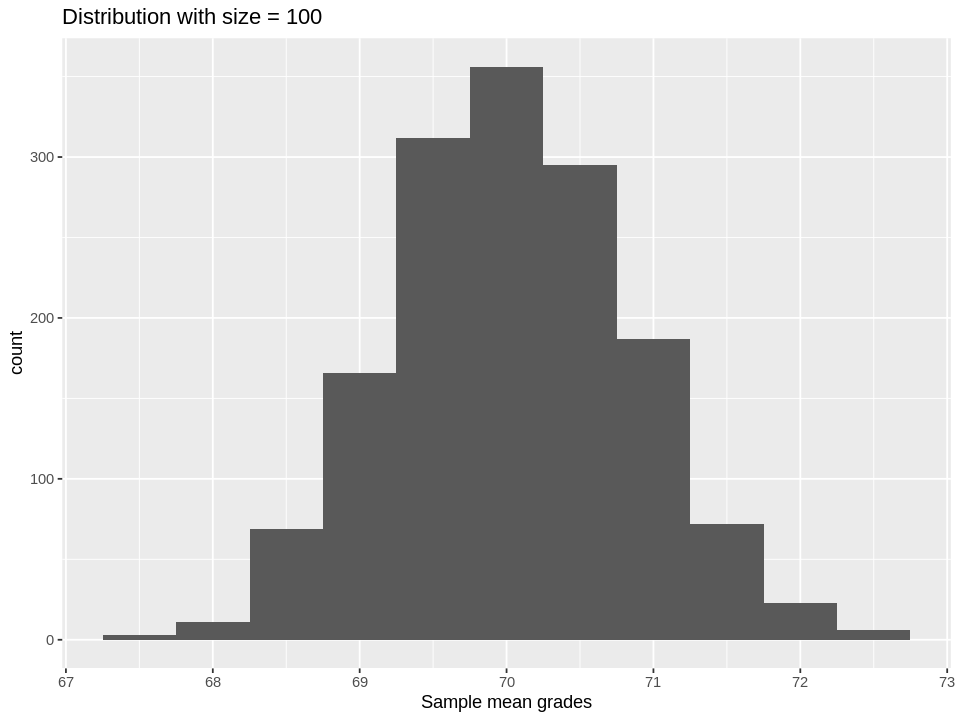

In [19]:
set.seed(4321) # DO NOT CHANGE!
sampling_distribution_100 <- rep_sample_n(students_pop,size=100,reps=1500) |>
                             group_by(replicate) |>
                             summarize(sample_mean = mean(grade)) |>
                             ggplot(aes(x=sample_mean)) +
                             geom_histogram(binwidth=0.5) +
                             labs(x="Sample mean grades") +
                             ggtitle("Distribution with size = 100")
 # No Answer - remove if you provide an answer
sampling_distribution_100

In [20]:
set.seed(4321) # DO NOT CHANGE!

# We check that you've created objects with the right names below
# But all other tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.
test_that('Did not create objects named sampling_distribution_100', {
    expect_true(exists("sampling_distribution_100")) 
    })


Test passed 🥇


**Question 1.6.2** 
<br> {points: 3}

*Suppose we do not know the parameter value for the population of data science students (as is usually the case in real life).* Compare your point estimates for the population mean from **Q1.2.1 and 1.2.3** above. Which of the two point estimates is more likely to be closer to the actual value of the average final grade of the population of data science students? Briefly explain. (Hint: look at the sampling distributions for your samples of size 5 and size 100 to help you answer this question).

Of the two point estimates, the more accurate value would be the point estimate from 1.2.3 where it takes a sample of size 100. This is because as a larger sample size is used, the closer the mean is to the actual value of the average final grade of the population.

**Question 1.7**
<br> {points: 1}

Let's create a simulated dataset of the number of cups of coffee drunk per week for our population of students. 
Describe in words the distribution, comment on the shape, center and how spread out the distribution is. 

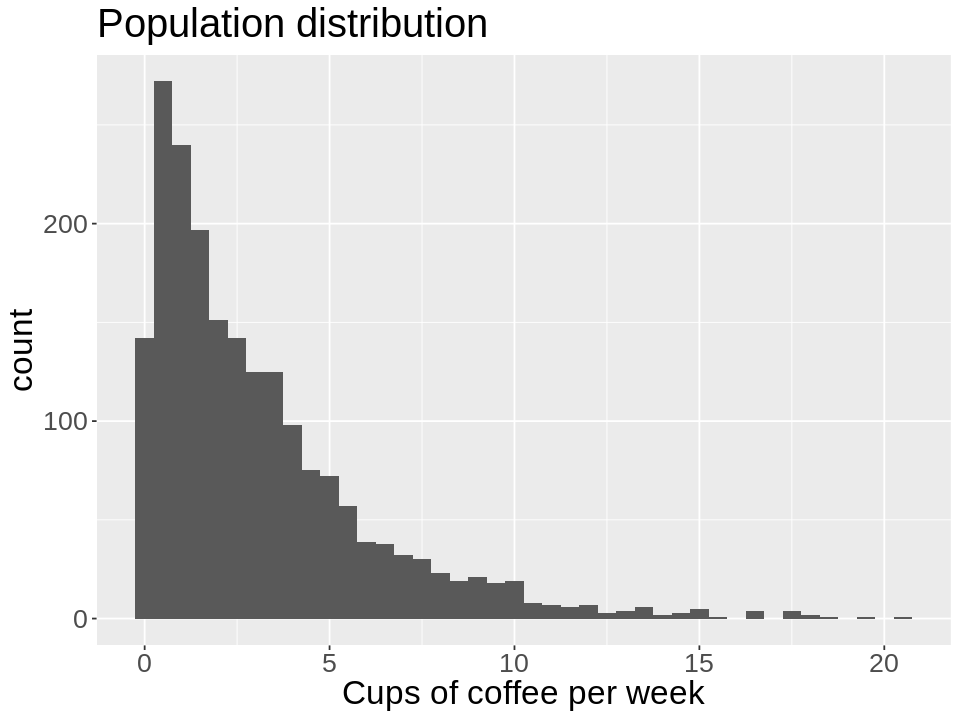

In [21]:
# run this cell to simulate a finite population
set.seed(2020) # DO NOT REMOVE
coffee_data = tibble(cups = rexp(n = 2000, rate = 0.34))

coffee_dist <- ggplot(coffee_data, aes(cups)) + 
    geom_histogram(binwidth = 0.5) +
    xlab("Cups of coffee per week") +
    ggtitle("Population distribution") +
    theme(text = element_text(size = 20))
coffee_dist

The distribution of this graph is right skewed, the center is around 1 and the distribution is spread quite widely from a range of 0 to 20. This means the median  amount of cups of coffee drank per week is around 1.

**Question 1.8**
<br> {points: 1}

Draw 1500 random samples from `coffee_data`. Each sample should have 5 observations. Assign this data frame to an object called `coffee_samples_5`.

Group by the sample replicate number, and then for each sample, calculate the mean. Name the data frame `coffee_sample_estimates_5`. The data frame should have the column names `replicate` and `coffee_sample_mean_5`.

Finally, create a plot of the sampling distribution called `coffee_sampling_distribution_5`.

> Hint: a bindwidth of 1 is a little too big for this data, try a bindwidth of 0.5 instead.

replicate,coffee_sample_mean_5
<int>,<dbl>
1,2.556328
2,4.067040
3,3.030184
⋮,⋮
1498,2.826998
1499,1.978601
1500,1.636511


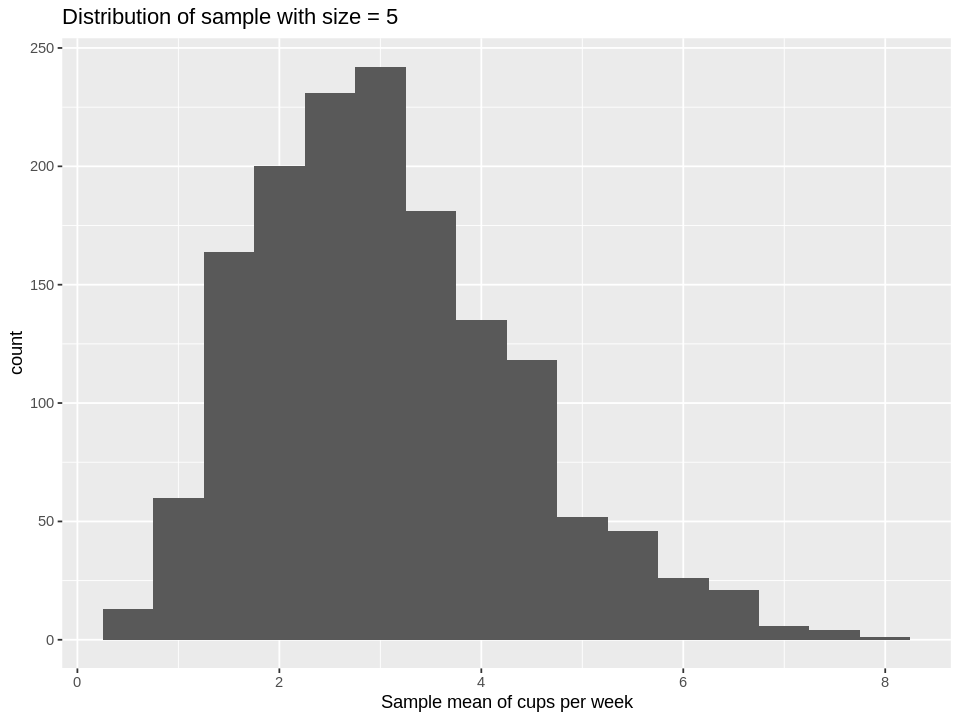

In [22]:
set.seed(4321) # DO NOT CHANGE!
coffee_samples_5 <- rep_sample_n(coffee_data, size = 5,reps = 1500)
coffee_sample_estimates_5 <- coffee_samples_5 |>
                             group_by(replicate) |>
                             summarize(coffee_sample_mean_5 = mean(cups))
coffee_sample_estimates_5

coffee_sampling_distribution_5 <- coffee_sample_estimates_5 |>
                                  ggplot(aes(x=coffee_sample_mean_5)) +
                                  geom_histogram(binwidth=0.5) +
                                  labs(x="Sample mean of cups per week") +
                                  ggtitle("Distribution of sample with size = 5") 
# your code here
# No Answer - remove if you provide an answer
coffee_sampling_distribution_5

In [23]:
test_1.8()

Test passed 🎉
Test passed 😸
Test passed 😀
Test passed 🥇
Test passed 😀
Test passed 🥳
Test passed 🌈
Test passed 🥇
Test passed 🎊
Test passed 😸
[1] "Success!"


**Question 1.9** 
<br> {points: 3}

Describe in words the distribution above, comment on the shape, center and how spread out the distribution is. Compare this sampling distribution to the population distribution above. 

The distribution above is a bell shape with the center at 3. The distribution of this graph is a lot more narrower than the population distribution above. The population distribution goes from 0 to 20 whereas the population distribution goes from 0 to 8.

**Question 2.0** 
<br> {points: 1}

Draw 1500 random samples from `coffee_data`. Each sample should have 5 observations. Assign this data frame to an object called `coffee_samples_30`.

Group by the sample replicate number, and then for each sample, calculate the mean. Name the data frame `coffee_sample_estimates_30`. The data frame should have the column names `replicate` and `coffee_sample_mean_30`.

Finally, create a plot of the sampling distribution called `coffee_sampling_distribution_30`.

> Hint: use `xlim` to control the x-axis limits so that they are similar to those in the histogram above. This will make it easier to compare this histogram with that one.

replicate,cups
<int>,<dbl>
1,2.146811
1,3.802117
1,2.043493
⋮,⋮
1500,3.006702
1500,5.326585
1500,1.459284


Warning message:
“Removed 2 rows containing missing values (geom_bar).”


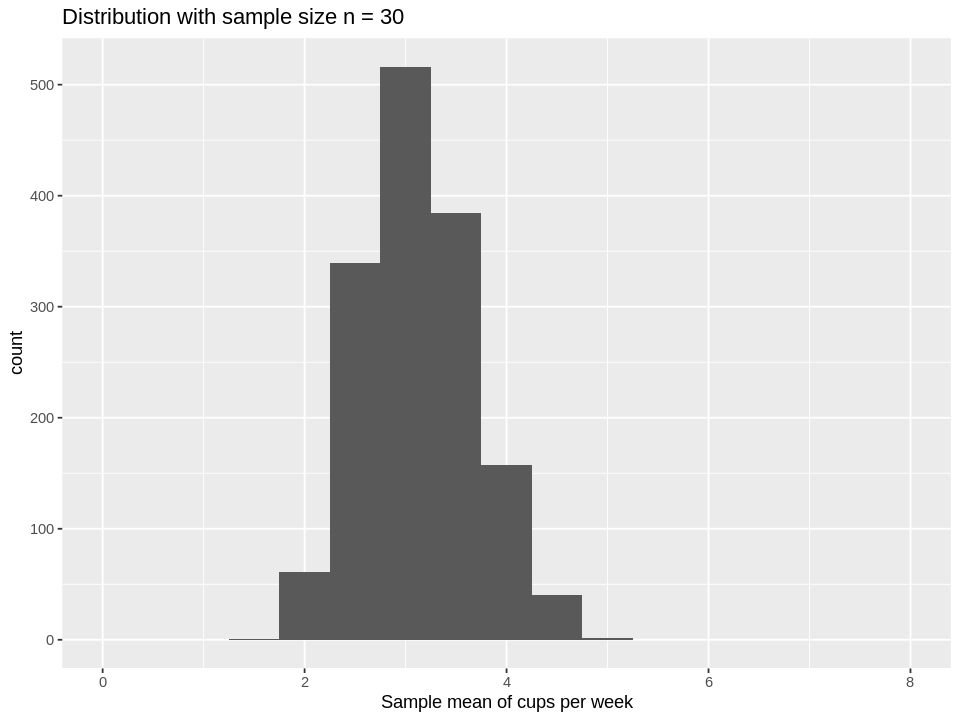

In [24]:
set.seed(4321) # DO NOT CHANGE!
coffee_samples_30 <- rep_sample_n(coffee_data,size=30,reps=1500) 

coffee_samples_30
coffee_sample_estimates_30 <- coffee_samples_30 |>
                              group_by(replicate) |>
                     summarize(coffee_sample_mean_30 = mean(cups))

coffee_sampling_distribution_30 <- coffee_sample_estimates_30 |>
                                   ggplot(aes(x=coffee_sample_mean_30)) +
                                   geom_histogram(binwidth=0.5) +
                                   labs(x="Sample mean of cups per week") +
                                   ggtitle("Distribution with sample size n = 30") +
                                   xlim(0,8)

# your code here
 # No Answer - remove if you provide an answer
coffee_sampling_distribution_30

In [25]:
test_2.0()

Test passed 😀
Test passed 😀
Test passed 🎊
Test passed 🌈
Test passed 😸
Test passed 🌈
Test passed 🎉
Test passed 🥳
Test passed 😀
Test passed 😸
[1] "Success!"


**Question 2.1** 
<br> {points: 3}

Describe in words the distribution above, comment on the shape, center and how spread out the distribution is. Compare this sampling distribution with samples of size 30 to the sampling distribution with samples of size 5. 

The distribution above is a bell graph with the center at 3.1. The distribution is significantlly narrower than the sampling distribution with size of 5. This shows that as the size of samples increases so does the precison of the estimate. 

In [26]:
source('cleanup.R')